In [231]:
import math
import cmath
import sympy as sp
from IPython.display import display
from matplotlib.ticker import EngFormatter

In [232]:
# Initialize engineering formatter
engf = EngFormatter(places=2)

In [233]:
# Functions to help series/parallel calculations
def recipsumrecip(data):
    # Returns the reciprocal of the sum of the reciprocals
    denom = 0
    for n in data:
        denom += 1/n
    return 1/denom

def recip(num):
    return 1/num

parallel = recipsumrecip
series = sum

In [234]:
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

In [235]:
def get_inductive_reactance(inductance,frequency):
    """
    Returns a complex number representing the impedance vector of an inductive reactance.
    Variables:
      inductance: The inductance measured in Henries
      frequency: The frequency measured in Hertz
    """
    period = 2*math.pi
    omega = period*frequency
    Xl = omega*inductance
    return complex(0,Xl)

In [236]:
def get_capacitive_reactance(capacitance,frequency):
    """
    Returns a complex number representing the impedance vector of an capacitive reactance.
    Variables:
      capacitance: The capacitance measured in Farads
      frequency: The frequency measured in Hertz
    """
    period = 2*math.pi
    omega = period*frequency
    Xc = 1/(omega*capacitance)
    return complex(0,-Xc)

In [237]:
def polar_format(complex_number):
    magnitude, radians = cmath.polar(complex_number)
    degrees = math.degrees(radians)
    return (magnitude,degrees)

def rect_format(magnitude,degrees):
    radians = math.radians(degrees)
    real = magnitude * math.cos(radians)
    imaginary = magnitude * math.sin(radians)
    return complex(real,imaginary)

### Problems 2, 10, and 16 located at the end of chapter 19.

### P2
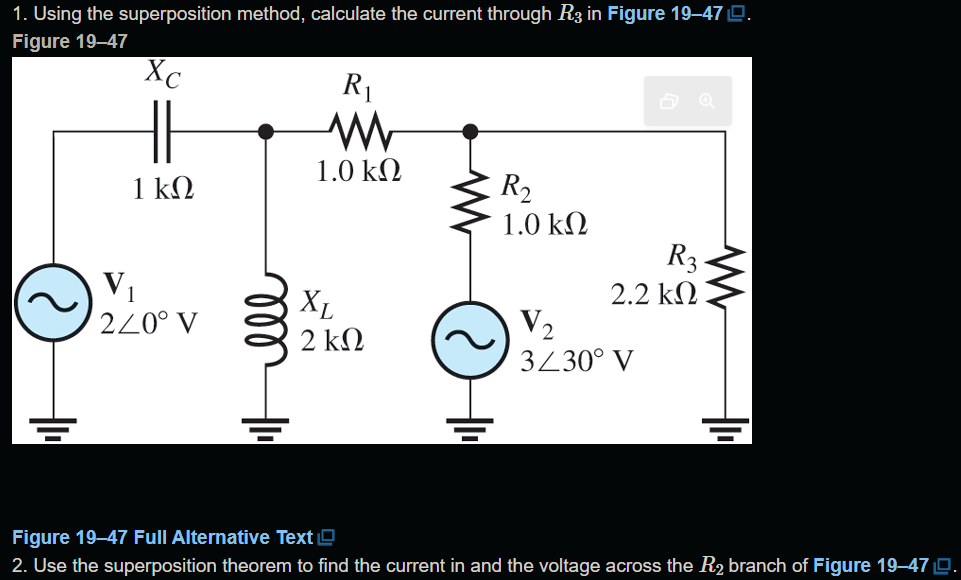

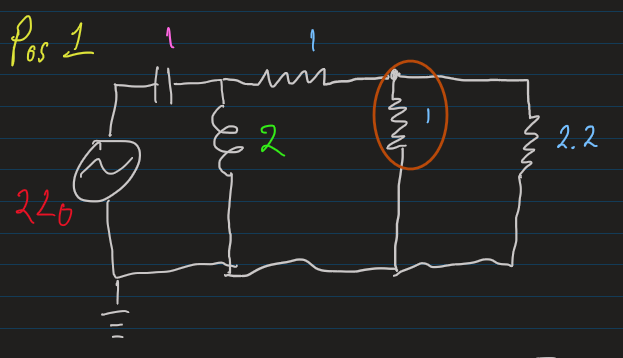

In [238]:
## Apply voltage divider to determine voltage above R2
lhs = -1j + parallel([2j,1])
rhs = parallel([1,2.2])

p1_vr2 = rhs/(lhs+rhs)*2
p1_vr2

(0.7950197388399636+0.3206802307925903j)

In [239]:
# Voltage from circuit 1
polar_format(p1_vr2)

(0.8572585348460247, 21.967243406812894)

In [240]:
# Current from circuit 1
p1_ir2 = p1_vr2/(1*si.k)
p1_ir2

(0.0007950197388399636+0.0003206802307925903j)

In [241]:
engf(polar_format(p1_ir2)[0]) #Degrees are same

'857.26 µ'

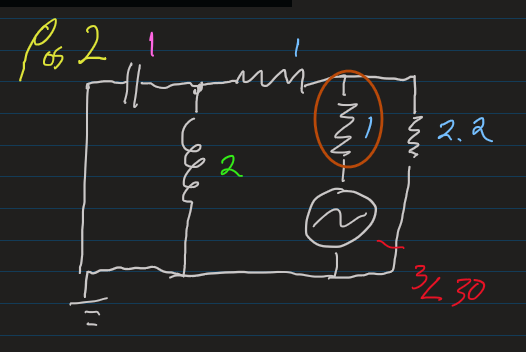

In [242]:
# In this configuration, all of the current passes through R2.
s2 = rect_format(3,30)
lhs = parallel([-1e3j,2e3j])+1e3
rt = parallel([lhs,2.2e3])+1e3
p2_ir2 = s2/(rt)
p2_ir2

(0.0009074462697876177+0.0010021303155433557j)

In [243]:
polar_format(p2_ir2)

(0.0013519333940259363, 47.83861716699718)

In [244]:
ir2 = p2_ir2 - p1_ir2
polar_format(ir2)

(0.0006906619599107434, 80.63165711601819)

In [245]:
engf(polar_format(ir2)[0])

'690.66 µ'

In [246]:
vr2 = ir2*1*si.k
polar_format(vr2)

(0.6906619599107433, 80.63165711601819)

### 10
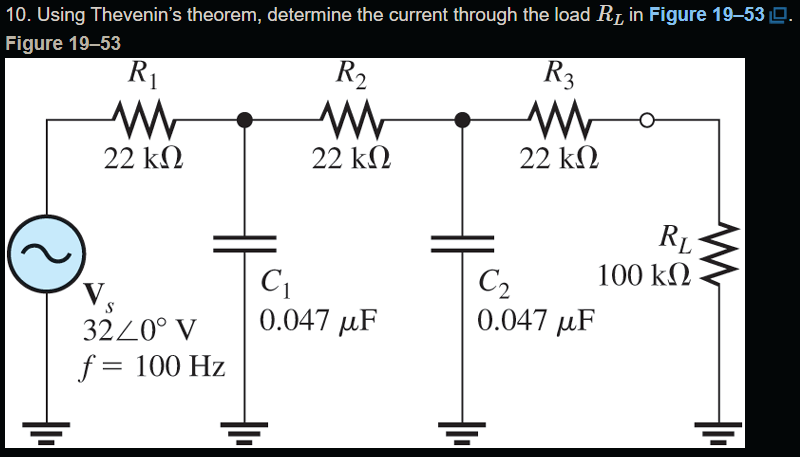

In [247]:
# Setting variable values
vSource = 32
f = 100
Xc1 = Xc2 = get_capacitive_reactance(47*si.n, f)
Xc1, Xc2

(-33862.75384933943j, -33862.75384933943j)

##### Load-perspective resistance (lpr)

In [248]:
r1 = r2 = r3 = 22*si.k
lpr = parallel([r1,Xc1]) + parallel([r2,Xc2]) + r3
lpr

(52940.46633333592-20101.44427006396j)

##### Open-load voltage (olv)

In [249]:
# olv == v_Xc2
lhs = parallel([r1,Xc1]) + r2 #left-hand side
# Voltage Divider
olv = vSource * (Xc2/(Xc2+lhs))
olv

(14.279447713000772-12.184283373236173j)

In [250]:
olv_polar = polar_format(olv)
olv_polar

(18.77123832643021, -40.47326876411119)

##### Thevenin's Equivalent

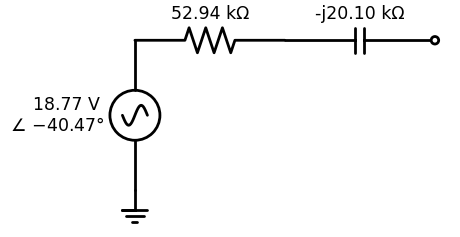

In [251]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourceSin(label=f'{engf(olv_polar[0])} V \n $\\angle$ {engf(olv_polar[1])}°').up() 
    elm.Resistor(label=f'{engf(lpr.real)}Ω').right()
    if lpr.imag > 0:
        elm.Inductor(label=f'j{engf(abs(lpr.imag))}Ω').right()
    if lpr.imag < 0:
        elm.Capacitor(label=f'-j{engf(abs(lpr.imag))}Ω').right()
    elm.Dot(open=True)


Current through 100kΩ load

In [252]:
i_load = olv/(lpr+100*si.k)
i_load

(0.00010207362711181758-6.625098176646626e-05j)

In [253]:
for n in polar_format(i_load):
    print(engf(n))

121.69 µ
−32.99


### 16
Determine load for maximum power transfer

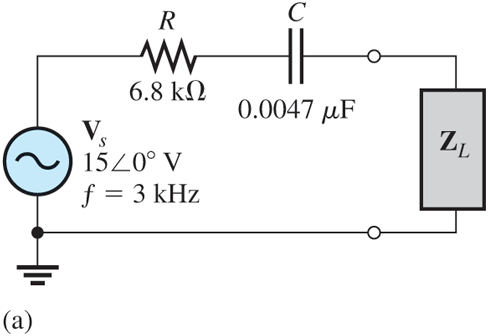

$$ Z_L = 13.18 \angle 58.9° kΩ $$

In [254]:
x = get_capacitive_reactance(4.7*si.n, 3*si.k) + 6.8*si.k
x = x.conjugate()
x

(6800+11287.584616446477j)

In [255]:
for n in polar_format(x):
    print(engf(n))

13.18 k
58.93


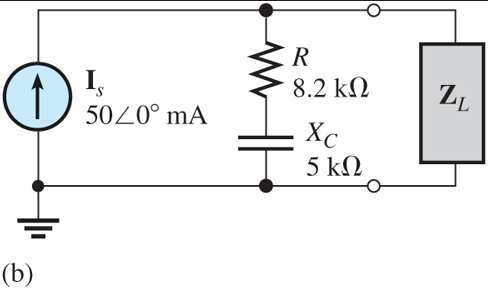

$$ Z_L = 9.6 \angle 31.37° kΩ $$

In [256]:
x = 8.2e3 +5e3j
x

(8200+5000j)

In [257]:
for n in polar_format(x):
    print(engf(n))

9.60 k
31.37


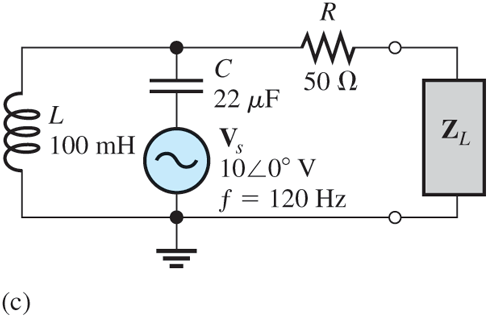

$$ Z_L = 50.9 \angle 47° kΩ $$

In [258]:
f = 120
xc = get_capacitive_reactance(22*si.u, f)
xl = get_inductive_reactance(100*si.m, f)
r = 50

In [259]:
zTotal = xc + parallel([r, xl])
zTotal

(34.72796000999707-37.256269546181684j)

In [260]:
zLoad = zTotal.conjugate()
zLoad

(34.72796000999707+37.256269546181684j)

In [261]:
x = zLoad
for n in polar_format(x):
    print(engf(n))

50.93
47.01
